<a href="https://colab.research.google.com/github/dschirmerii/Complete-Python-3-Bootcamp/blob/master/Vgg16modeltest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libaries
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import os
import numpy as np
import shutil

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Jul 31 01:58:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
rootdir= '/MyDrive/Project 2/aaplcandles/' #path of the original folder
classes = ['buy','sell']

In [6]:
!pip install split-folders

In [8]:
import splitfolders

In [11]:
cd drive/MyDrive/Project 2

/content/drive/MyDrive/Project 2


In [ ]:

splitfolders.ratio('aaplcandles', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

In [14]:
cd output

/content/drive/My Drive/Project 2/output


In [29]:
os.listdir("./train")

['buy', 'sell', '.ipynb_checkpoints']

In [ ]:
shutil.rmtree("./test/.ipynb_checkpoints")

In [ ]:
shutil.rmtree("./train/.ipynb_checkpoints")

In [ ]:
shutil.rmtree("./val/.ipynb_checkpoints")

In [33]:
# setting the training/testing data-jng
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="./test", target_size=(224,224))
vldata=ImageDataGenerator()
valdata=tsdata.flow_from_directory(directory="./val", target_size=(224,224))

Found 799 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [35]:
#Building the model 
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="tanh"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="tanh"))
model.add(Dense(units=4096,activation="tanh"))
model.add(Dense(units=2, activation="sigmoid"))

Change activation layer to sigmoid

In [36]:
# setting up the optimizer and compiler
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile( optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [37]:
#summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 256)      

In [39]:
# setting up modeling Checkpoints and Early Stopping
# steps_per_epoch = n_samples / batch_size
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata,batch_size=32,steps_per_epoch=25, validation_data=testdata, validation_steps=10,epochs=50,callbacks=[checkpoint,early])

Epoch 1/50
 1/25 [>.............................] - ETA: 44s - loss: 0.7154 - accuracy: 0.5000
Epoch 00001: saving model to vgg16_1.h5
 2/25 [=>............................] - ETA: 4:55 - loss: 1672.8447 - accuracy: 0.5234
Epoch 00001: saving model to vgg16_1.h5
 3/25 [==>...........................] - ETA: 4:58 - loss: 1872.7259 - accuracy: 0.5191
Epoch 00001: saving model to vgg16_1.h5
 4/25 [===>..........................] - ETA: 5:18 - loss: 1831.3359 - accuracy: 0.5104
Epoch 00001: saving model to vgg16_1.h5
 5/25 [=====>........................] - ETA: 5:19 - loss: 1739.7905 - accuracy: 0.5083
Epoch 00001: saving model to vgg16_1.h5
 6/25 [======>.......................] - ETA: 5:22 - loss: 1640.7594 - accuracy: 0.5113
Epoch 00001: saving model to vgg16_1.h5
 7/25 [=======>......................] - ETA: 5:18 - loss: 1546.6659 - accuracy: 0.5103
Epoch 00001: saving model to vgg16_1.h5
 8/25 [========>.....................] - ETA: 4:50 - loss: 1460.8023 - accuracy: 0.5076
Epoch 000

In [1]:
#analysis of model
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

NameError: ignored

In [ ]:
cd /content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dog vs cat/dataset

/content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dog vs cat/dataset


dog


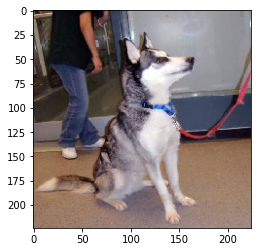

In [ ]:
#Testing
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dataset/test_set/dogs/dog.4001.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model('vgg16_1.h5')
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("dog")
else:
    print('cat')